### Student Information
Name: 譚嘉葳

Student ID: 113033597

GitHub ID: Chiawei0822

Kaggle name: Chia-Wei,Tan

Kaggle private scoreboard snapshot: 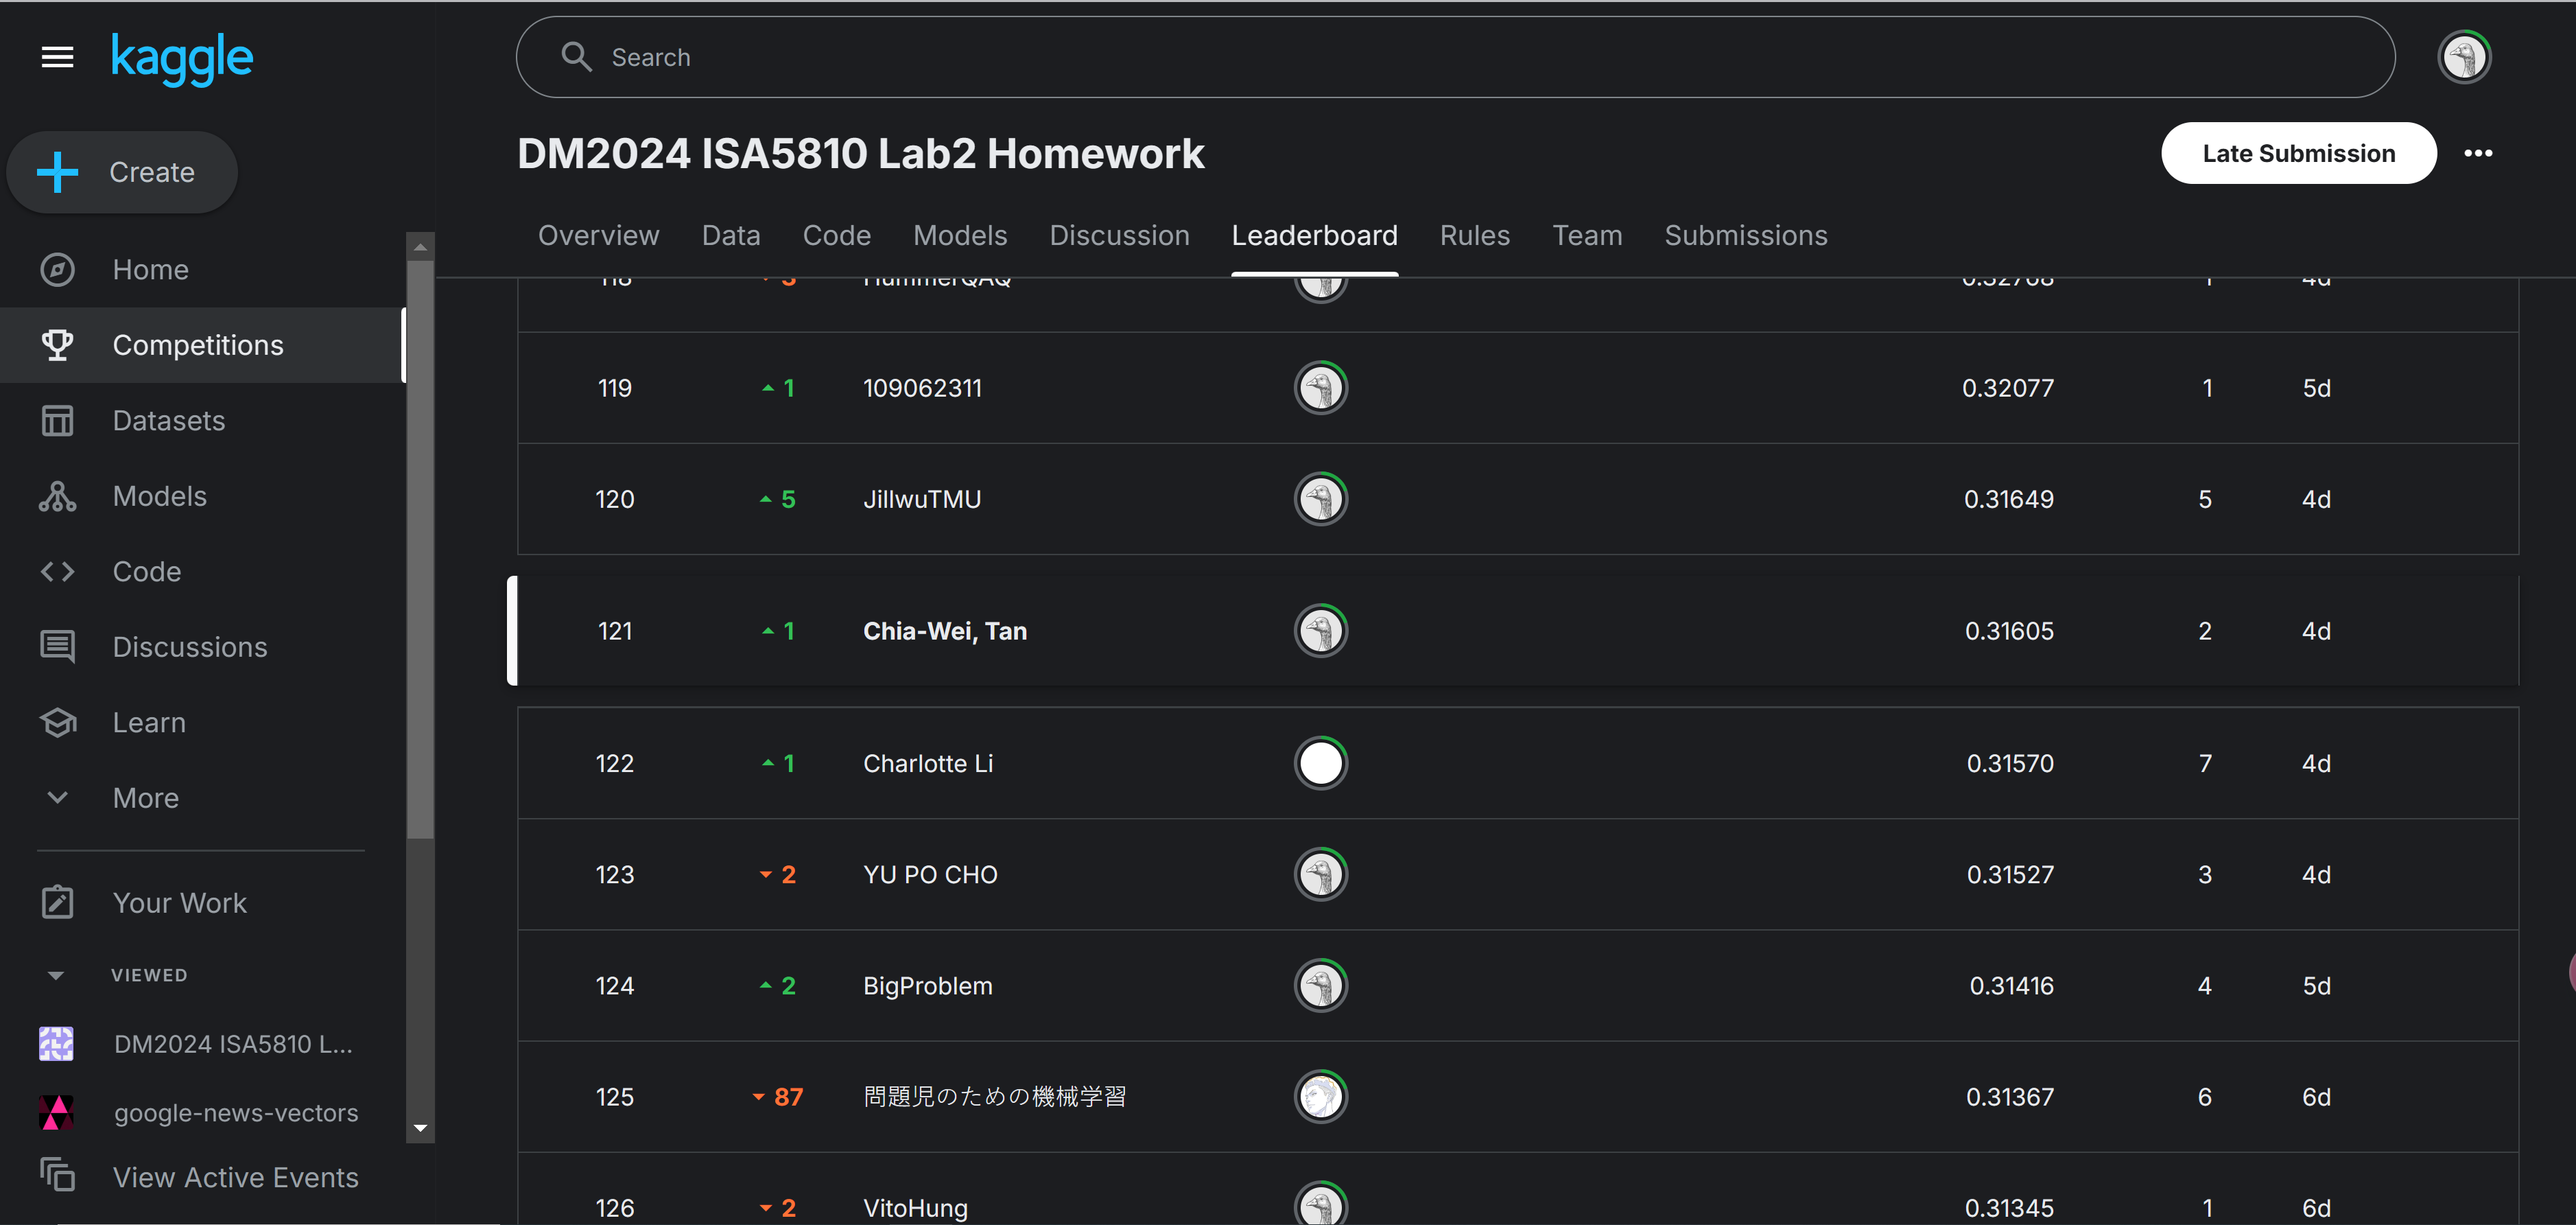

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import pandas as pd

count_vect_train = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text)
train_total_counts = train_counts.sum(axis=0).A1
train_vocab = count_vect_train.get_feature_names_out()

train_plot_df = pd.DataFrame({'word': train_vocab, 'total_count': train_total_counts})
train_plot_df = train_plot_df.sort_values(by='total_count', ascending=False)


count_vect_test = CountVectorizer()
test_counts = count_vect_test.fit_transform(test_df.text)
test_total_counts = test_counts.sum(axis=0).A1
test_vocab = count_vect_test.get_feature_names_out()

test_plot_df = pd.DataFrame({'word': test_vocab, 'total_count': test_total_counts})
test_plot_df = test_plot_df.sort_values(by='total_count', ascending=False)


fig_train = px.bar(
    train_plot_df[:30], 
    x='word', 
    y='total_count', 
    text='total_count', 
    title='Top 30 Words in Train Dataset'
)
fig_train.update_traces(textposition='outside')


fig_test = px.bar(
    test_plot_df[:30], 
    x='word', 
    y='total_count', 
    text='total_count', 
    title='Top 30 Words in Test Dataset'
)
fig_test.update_traces(textposition='outside')

fig_train.update_layout(yaxis=dict(range=[0, 2000])) 
fig_test.update_layout(yaxis=dict(range=[0, 200]))
fig_train.show()
fig_test.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) # 1000 features
data_tfidf = tfidf.fit_transform(train_df.text)

feature_names_1000 = tfidf.get_feature_names_out()
print(feature_names_1000[100:110])

['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
print('混淆矩陣是一種用來評估分類模型性能的工具，每行代表實際標籤，每列代表模型的預測標籤。')
print('對角線上的數值表示正確分類的數量，非對角線上的數值表示分類錯誤的數量。')
print('從這個矩陣看，模型在 fear（正確分類 76）和 joy（正確分類 56）上的表現最佳，但 anger 和 fear，以及 sadness 和 fear 之間有明顯的混淆。')

混淆矩陣是一種用來評估分類模型性能的工具，每行代表實際標籤，每列代表模型的預測標籤。
對角線上的數值表示正確分類的數量，非對角線上的數值表示分類錯誤的數量。
從這個矩陣看，模型在 fear（正確分類 76）和 joy（正確分類 56）上的表現最佳，但 anger 和 fear，以及 sadness 和 fear 之間有明顯的混淆。


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
train score: 0.7918627179629117
test score: 0.6974063400576369
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



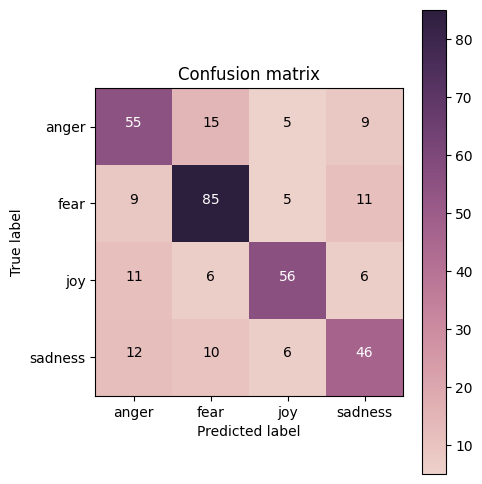

In [ ]:
# Answer here
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

print("train score:", mnb.score(X_train, y_train))
print("test score:", mnb.score(X_test, y_test))

y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)
 
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# my_tags = ['anger', 'fear', 'joy', 'sadness']
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
print('Decision Tree在每個節點上都會選擇能最大程度減少隨機性的分裂方式')
print('Naive Bayes則是會以每個特徵互相獨立的假設作為基礎並用機率分布進行分類')
print('從兩者的precision、recall和 F1-score 的比較中可以發現Dcision Tree結果比Naive Bayes均衡。這是因為Decision Tree的設計目標是盡量減少隨機性，而Navie Bayes則是基於每個特徵的獨立機率運作，因此在本案例中可能是fear標籤的資料相較其他標籤擁有更多不同的關鍵詞，因此Naive Bayes更容易在抓到這些關鍵詞後將該樣本分類為fear')
print('以下總結：')
print('Naive Bayes 更適合有明顯特徵的分類任務（如情感標籤中有明確的關鍵詞）。')
print('Decision Tree 更適合多樣性特徵分佈的數據集，能產生更均衡的預測結果。')

Decision Tree在每個節點上都會選擇能最大程度減少隨機性的分裂方式
Naive Bayes則是會以每個特徵互相獨立的假設作為基礎並用機率分布進行分類
從兩者的precision、recall和 F1-score 的比較中可以發現Dcision Tree結果比Naive Bayes均衡。這是因為Decision Tree的設計目標是盡量減少隨機性，而Navie Bayes則是基於每個特徵的獨立機率運作，因此在本案例中可能是fear標籤的資料相較其他標籤擁有更多不同的關鍵詞，因此Naive Bayes更容易在抓到這些關鍵詞後將該樣本分類為fear
以下總結：
Naive Bayes 更適合有明顯特徵的分類任務（如情感標籤中有明確的關鍵詞）。
Decision Tree 更適合多樣性特徵分佈的數據集，能產生更均衡的預測結果。


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

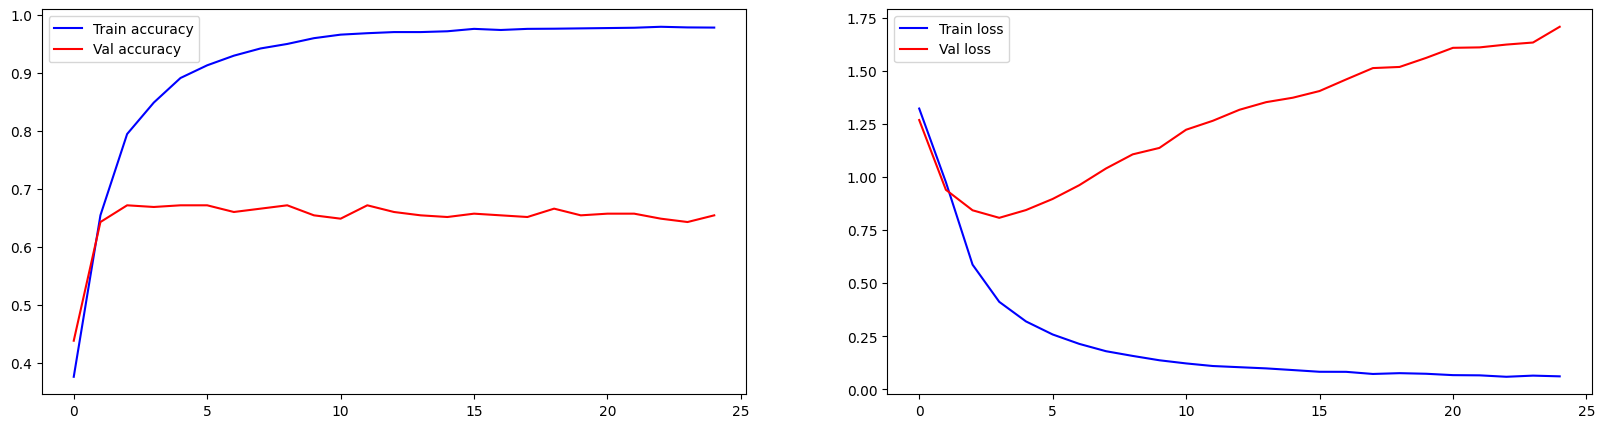

In [ ]:
# Answer here
epoch = training_log.epoch.to_numpy()
train_acc = training_log.accuracy.to_numpy()
val_acc = training_log.val_accuracy.to_numpy()
loss = training_log.loss.to_numpy()
val_loss = training_log.val_loss.to_numpy()

figure, axis = plt.subplots(1, 2, figsize=(20, 5))

axis[0].plot(epoch, train_acc, color='blue', label='Train accuracy')
axis[0].plot(epoch, val_acc, color='red', label='Val accuracy')
axis[0].legend()

axis[1].plot(epoch, loss, color='blue', label='Train loss')
axis[1].plot(epoch, val_loss, color='red', label='Val loss')
axis[1].legend()

plt.show()

---

---

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

# Import Library

In [ ]:
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Data

In [ ]:
# Read data

data = []
with open('/Users/vivian/OneDrive - NTHU/文件/清大/Data mining/DMLab2/hw/tweets_DM.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
 
f.close()
emotion = pd.read_csv('C:/Users/vivian/OneDrive - NTHU/文件/清大/Data mining/DMLab2/hw/emotion.csv')
data_identification = pd.read_csv('C:/Users/vivian/OneDrive - NTHU/文件/清大/Data mining/DMLab2/hw/data_identification.csv')

# Build a new dataframe by selecting useful features.

In [ ]:
# Filter out the 'train' data
df = pd.DataFrame(data)
_source = df['_source'].apply(lambda x: x['tweet'])
df = pd.DataFrame({
    'tweet_id': _source.apply(lambda x: x['tweet_id']),
    'hashtags': _source.apply(lambda x: x['hashtags']),
    'text': _source.apply(lambda x: x['text']),
})
df = df.merge(data_identification, on='tweet_id', how='left')

train_data = df[df['identification'] == 'train']

# Preprocess

In [ ]:
train_data = train_data.merge(emotion, on='tweet_id', how='left') # Merge emotion for corresponding tweet_id
train_data.drop_duplicates(subset=['text'], keep=False, inplace=True) # Remove duplication

In [ ]:
train_data_sample = train_data.sample(frac=0.1) # Get sample

In [ ]:
train_data_sample

,tweet_id,hashtags,text,identification,emotion
583779,0x2d1093,[please],@ThatKevinSmith @smosier is the SMODcast you ...,train,trust
1406190,0x2edc0f,"[needfood, wantfood, givemefood]",Willing to burpee/jump squat for Jaffa Cakes r...,train,anticipation
383009,0x286121,[Power5at5],Hey @POWERATL @maddoxradio please play <LH> by...,train,sadness
1371071,0x368aff,[bathe],Does it ever dawn on people that they smell li...,train,disgust
508450,0x2c05eb,[],@JL_Baseball I was thinking contact not a hit ...,train,disgust
...,...,...,...,...,...
1447103,0x288016,[],@KingsbarnsGL what hole is the 18th for the Op...,train,sadness
279224,0x1f202d,[],"Hey @GeorgeTakei, don’t speak from a moral hig...",train,disgust
874274,0x1f8073,"[problems, to, people]","Your ""sorry"" works when you made a mistake but...",train,trust
1269672,0x23df51,[loveliveLife],Challenges and Goals for 2018! <LH> #loveliveL...,train,joy


### Droping tweet_id and identification, because it isn't going to be features used on training

In [ ]:
y_train_data = train_data_sample['emotion']
X_train_data = train_data_sample.drop(['tweet_id', 'emotion', 'identification'], axis=1)
X_train_data = X_train_data['text'] + ' ' + X_train_data['hashtags'].apply(lambda x: ' '.join(x)) # Combine text and hashtags 

In [ ]:
# y_train_data = train_data['emotion']
# X_train_data = train_data.drop(['tweet_id', 'emotion', 'identification'], axis=1)
# X_train_data = X_train_data['text'] + ' ' + X_train_data['hashtags'].apply(lambda x: ' '.join(x)) # Combine text and hashtags 

In [ ]:
X_train_data

242688     Baby sister got her first promotion. Climbing ...
852865     Just wondering how many people follow etiquett...
865202     @CanadianPM Happy Vote @CPC_HQ 2019 Day!!!!! #...
776645     @AlexaDWilson @jtlovell1979 An elderly lady at...
604907     Judges 9:15 And the #bramble said to the #tree...
                                 ...                        
1275558    When your dad pulls through and buys chatime 👏...
646215     I'm so grateful I could burst! <LH> #gratitude...
1335474    Aliens exist. I am one, jk. But Toby McGuire h...
1429934    God wants us to always remember that He knows ...
61146      Pls follow me or be my friend I’m a nice human...
Length: 144918, dtype: object

### For the current stage, we now have combination of text and hashtags.

In [ ]:
from sklearn.model_selection import train_test_split
# Split training and testing data for evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42, stratify=y_train_data) 


In [ ]:
tfidf = TfidfVectorizer(max_features=1000) # Use tfidfVectorizer and remove stop_words.
X = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test)

In [ ]:
le = LabelEncoder() # Label target
y = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
clf = RandomForestClassifier() # Use RandomForest model
clf.fit(X, y)
model = clf

In [ ]:
y_pred = model.predict(X_test) # Predict

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # Evaluation

0.4913400496825835

# Deal with test data

### Convert test data into the form that same as train data.

In [ ]:
test_data = df[df['identification'] == 'test'] # Get the test data from df

In [ ]:
# Do the same thing as training stage, but here we don't have emotions feature.
X_test_data = test_data.drop(['tweet_id', 'identification'], axis=1)
X_test_data = X_test_data['text'] + ' ' + X_test_data['hashtags'].apply(lambda x: ' '.join(x))

In [ ]:
X_test_data = tfidf.transform(X_test_data).toarray() # Convert test data by using same tfidfVectorizer

In [ ]:
y_test_pred = model.predict(X_test_data)

In [ ]:
y_pred_labels = le.inverse_transform(y_test_pred) # Inverse predict labels back to adjective words

## Make up submit format

In [ ]:
submission = pd.DataFrame({
    'id': test_data['tweet_id'],
    'emotion': y_pred_labels
})

In [ ]:
submission.to_csv('C:/Users/vivian/OneDrive - NTHU/文件/清大/Data mining/DMLab2/hw/submission.csv', index=False)